In [ ]:
"""
ین تصویر را دریافت کنید و با استفاده از مراحل گفته شده در کالس به صورت کارتونی درآورید. کد خود را بر روی یک عکس
دلخواه دیگر نیز امتحان کنید و نتایج آن را نشان دهید
"""

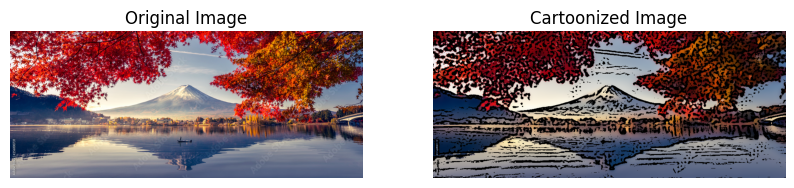

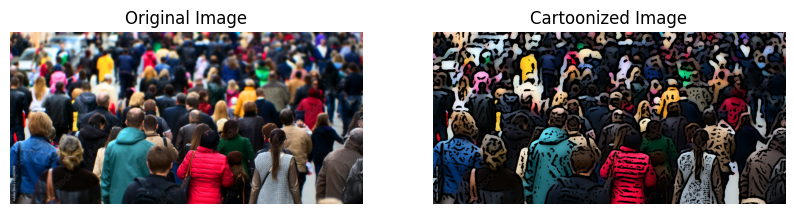

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpli
import cv2

def cartoonize(image_path):
    # Read the image using matplotlib
    rgb= mpli.imread(image_path)
    
    # Convert image to BGR format for OpenCV operations
    bgr= cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
    
    # 1. Apply bilateral filter to smooth the image
    num_bilateral= 7  # Number of bilateral filtering steps
    imgColor= bgr
    for i in range(num_bilateral):
        imgColor = cv2.bilateralFilter(imgColor, d=9, sigmaColor=75, sigmaSpace=75)

    # 2. Convert to grayscale and apply median blur
    gray= cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    blur= cv2.medianBlur(gray, 7)

    # 3. Detect edges using adaptive thresholding
    edge= cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                     cv2.THRESH_BINARY, blockSize=9, C=2)

    # 4. Combine color image with edges
    edge= cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
    cartoon = cv2.bitwise_and(imgColor, edge)

    # Display the results
    fig, axes= plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Cartoonized Image')
    axes[1].axis('off')
    
    plt.show()

# Apply the cartoonize function to your image
cartoonize('D:\\sadeneh\\تمرین دوم\\سادنه صادقی- 9913012008\\Q3\\3.jpg')

# Apply the cartoonize function to another image for comparison
cartoonize('D:\\sadeneh\\تمرین دوم\\سادنه صادقی- 9913012008\\Q4\\4.1.jpg')
